# Prediccion de si las personas creen que les afecta el uso de su celular 
## Integrantes: 
* Antonio Ortegón
* Eduardo Fraire
* Luis Ordoñez

### Problema: 
Nosotros cómo equipos nos planteamos la problematica de predecir si las personas creen que les afecta el uso del celular mediante las siguientes preguntas: 

- ¿Locales o Foraneos?

- ¿Estudian o Trabajan'

- La edad que tienen

- ¿Cuánto pagan en su plan mensual?

- Veces que checan su celular al día

- Las horas que duermen

- ¿Cuántas veces cargan su celular?

- El tiempo en pantalla

- Tiempo en redes sociales

## Objetivos:
* Predecir si en realidad hay una relación entre las variables que estamos proponiendo con si en realidad las personas creen qe el uso de su celular les afecta.  
### Objetivos especifios: 
* Determinar las variables cuantitatvas y cualitativas.
* Analizar como afectan estás variables
* Contruir un modelo de regresión lógistica

### Modelo

$$ y = \frac{1}{1 + e^{-(\beta_0 + \beta_1 L/F + \beta_2 E/T + \beta_3 años + \beta_4 dinero + \beta_5 veces + \beta_6 sueño + \beta_7 cargas + \beta_8 tiempop + \beta_9 tiempo rm)}} $$


$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

### Variables

- Local/foraneo---L

- Trabajas/Estudias--E

- Año---anho

- Dinero---D

- Veces---Ve

- Sueño---Sue

- Cargas---C

- Tiempo p--- TP

- Tiempio--- RM





### Referencia: 

https://iteso01-my.sharepoint.com/:x:/g/personal/antonio_ortegon_iteso_mx/EZWUG0dpdK9Ipttincd5Y3oB_O8V49AEeEOgkQwxGZsRXg?e=6RfXKA

### Resolocuión mediante python

### 1. Importar el la base de datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy import stats
from scipy.stats import norm
datos=pd.read_csv("Foraneos VS Locales.csv")
datos

,Marca temporal,EU\n,L/F,E/T,Años,Mometos,Afecta,Razones,Reaccion,Cambios,Dinero,Veces,Sueño,Cargas,Tiempo p,Tiempo RM
0,5/29/2024 12:56:01,Si,Local,Solo estudio,18,Cuando estoy en mi casa,No,"Buscar algo en internet, ver mis redes sociale...","Ninguna, no me causa ningún problema",Cuando veo mis redes no estar tanto tiempo vie...,200,7,0,2,60,1.5
1,5/29/2024 13:09:35,Si,Local,Solo estudio,20,En la noche,Si,Ocio y procrastinación,Me aburro,Dejar de verlo como un medio de salir de mi ab...,200,35,2,2,60,1.5
2,5/29/2024 13:09:36,Si,Local,Solo estudio,19,En mis tiempos libres,No,Redes sociales,No me molesta,Tal vez usarlo un poco menos,150,250,2,1,15,5.5
3,5/29/2024 16:15:14,Si,Local,Solo estudio,18,Tardes,Si,Entretenimiento,Ninguna,Disminuirlo,390,15,2,3,0,3.0
4,5/29/2024 17:47:48,Si,Foráneo,Solo estudio,24,En la noche,Si,Por entretenimiento y comunicación,Ninguna,El sonido,200,25,2,1,120,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,06/03/2024 21:14,Si,Local,Trabajo y estudio,19,En las mañanas,Si,Redes sociales como Instagram y medios de comu...,No me gusta me siento mal,Dejarlo de usar con fines de procrastinación,150,200,2,1,0,1.0
96,06/03/2024 22:17,Si,Local,Trabajo y estudio,19,Noche,No,Tiempo libre y aburrimiento,Me da más o menos igual,No usarlo tan seguido,120,20,2,1,120,1.3
97,06/03/2024 22:50,Si,Local,Trabajo y estudio,19,Todo el dia,Si,Vida social trabajo y escuela,Me pongo nervioso tio,Cambiar al iphone 15,500,250,4,1,190,8.0
98,06/04/2024 15:12,Si,Local,Trabajo y estudio,19,en mis tiempos libres,Si,me entretengo con él,"me da un poco de ansiedad, pero nada grave","ninguno, estoy a gusto",400,250,0,1,290,3.0


### 2. Conversión de las variables cualitativas a categoricas

In [6]:
datos["L/F"]=datos["L/F"].astype("category")
datos["E/T"]=datos["E/T"].astype("category")


### 3. Cajas de bigotes

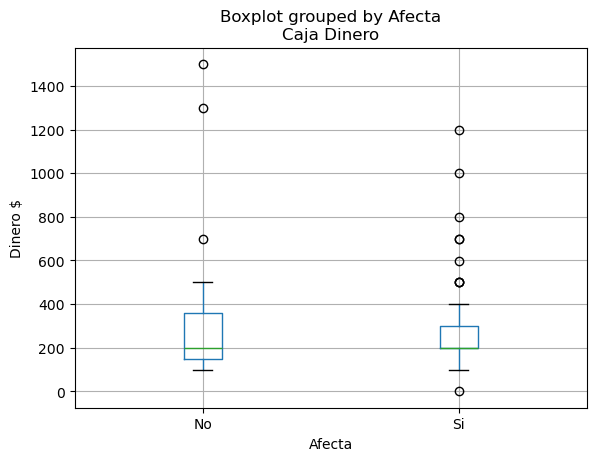

In [9]:
datos.boxplot(column="Dinero", by="Afecta")
plt.title("Caja Dinero")
plt.xlabel("Afecta")
plt.ylabel("Dinero $")
plt.show()

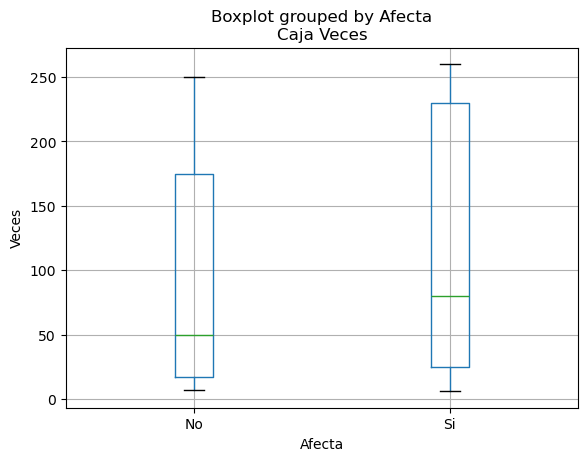

In [11]:
datos.boxplot(column="Veces", by="Afecta")
plt.title("Caja Veces")
plt.xlabel("Afecta")
plt.ylabel("Veces")
plt.show()

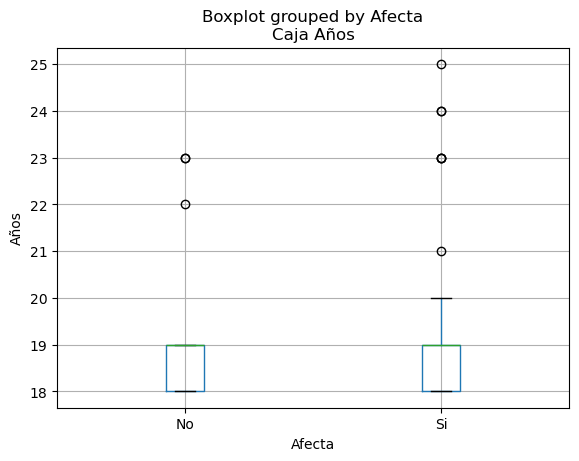

In [13]:
datos.boxplot(column="Años", by="Afecta")
plt.title("Caja Años")
plt.xlabel("Afecta")
plt.ylabel("Años")
plt.show()

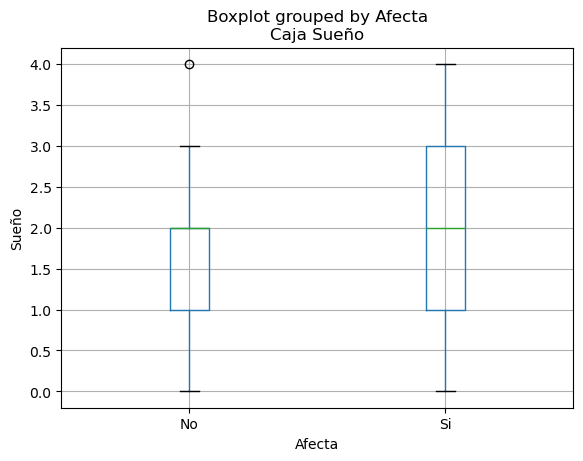

In [15]:
datos.boxplot(column="Sueño", by="Afecta")
plt.title("Caja Sueño")
plt.xlabel("Afecta")
plt.ylabel("Sueño")
plt.show()

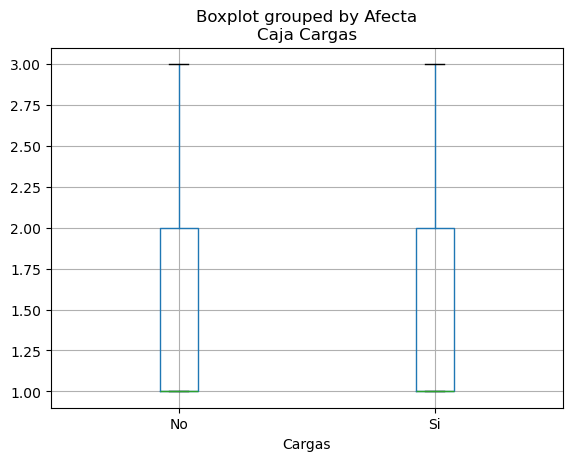

In [17]:
datos.boxplot(column="Cargas", by="Afecta")
plt.title("Caja Cargas")
plt.xlabel("Afecta")
plt.xlabel("Cargas")
plt.show()

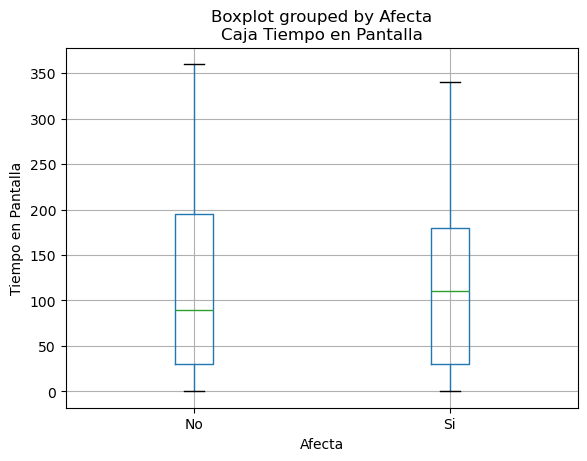

In [19]:
datos.boxplot(column="Tiempo p", by="Afecta")
plt.title("Caja Tiempo en Pantalla")
plt.xlabel("Afecta")
plt.ylabel("Tiempo en Pantalla")
plt.show()

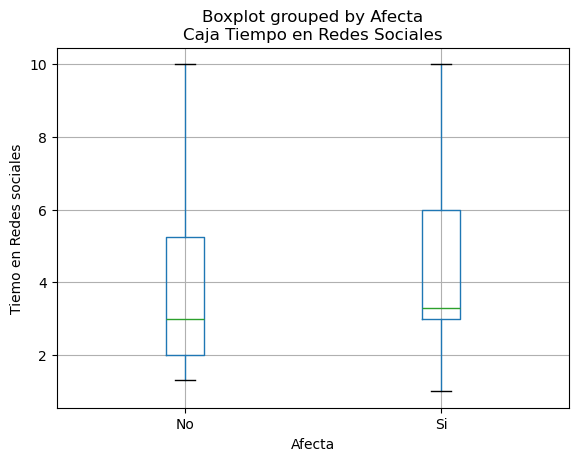

In [21]:
datos.boxplot(column="Tiempo RM", by="Afecta")
plt.title("Caja Tiempo en Redes Sociales")
plt.xlabel("Afecta")
plt.ylabel("Tiemo en Redes sociales")
plt.show()

In [23]:
y=datos["EU\n"]=="Si"
x=datos["L/F"]

### 4. Acomodo de Variables a enteras para Dinero y Tiempo en Redes Sociales

datos["Dinero"].astype(int)
datos["Tiempo RM"].astype(int)

### 5. Eliminar Casillas en Blanco en caso de haberlas

In [28]:
datos = datos.dropna()

### Generas Betas

In [50]:
datos['L/F_num'] = datos['L/F'].map({'Local': 1, 'Foráneo': 0})
datos['E/T_num'] = datos['E/T'].map({'Solo estudio': 1, 'Trabajo y estudio': 0})
y=datos["Afecta"]=="Si"
n = len(y)
ones=np.ones([n, 1])
E=np.reshape(datos["E/T_num"], [n, 1])
L=np.reshape(datos["L/F_num"], [n, 1])
anho=np.reshape(datos["Años"], [n, 1])
D=np.reshape(datos["Dinero"], [n, 1])
Ve=np.reshape(datos["Veces"], [n, 1])
Sue=np.reshape(datos["Sueño"], [n, 1])
C=np.reshape(datos["Cargas"], [n, 1])
TP=np.reshape(datos["Tiempo p"], [n, 1])
TRM=np.reshape(datos["Tiempo RM"], [n, 1])
X=np.hstack((ones, L, E, anho, D, Ve, Sue, C, TP , TRM))
y_vector=np.reshape(y, [n, 1])
def predi(beta, X): 
    return 1/(1+np.exp(-X@beta))
def J(beta, X, y):
    epi=1e-10
    n, p=X.shape
    beta=np.reshape(beta, [p, 1])
    y_pred=predi(beta,X)
    e=y*np.log(y_pred+epi)+(1-y)*np.log(1-y_pred+epi)
    return -(np.sum(e)) ### -np.linalg.norm(beta)**2)



C:\Users\AMunoz\AppData\Local\Temp\ipykernel_704\129632009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['L/F_num'] = datos['L/F'].map({'Local': 1, 'Foráneo': 0})
C:\Users\AMunoz\AppData\Local\Temp\ipykernel_704\129632009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['E/T_num'] = datos['E/T'].map({'Solo estudio': 1, 'Trabajo y estudio': 0})


### Ajuste

In [52]:
beta=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
log=opt.minimize(J, beta, args=(X, y_vector))
log

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 53.83646008138659
        x: [-3.204e+00 -1.791e-01  8.096e-01  1.656e-01 -1.330e-03
             4.715e-03  2.403e-01  1.981e-01 -5.578e-04 -1.265e-02]
      nit: 20
      jac: [-4.768e-07  0.000e+00  4.768e-07  1.907e-06  5.722e-04
            -4.768e-07 -4.768e-07  4.768e-07  1.345e-04  0.000e+00]
 hess_inv: [[ 1.599e+01 -1.271e+00 ... -1.260e-03  2.408e-02]
            [-1.271e+00  5.548e-01 ...  1.141e-04 -6.399e-04]
            ...
            [-1.260e-03  1.141e-04 ...  7.551e-06 -3.509e-05]
            [ 2.408e-02 -6.399e-04 ... -3.509e-05  1.462e-02]]
     nfev: 584
     njev: 52

In [54]:
pre=predi(log.x, X)
p=pre*(1-pre)
V=np.diagflat(p)
cov = np.linalg.inv(X.T @ V @ X)
se = np.sqrt(np.diag(cov))
este=log.x/se
p_v=2 * (1 - norm.cdf(abs(este)))
p_v

array([0.46032078, 0.82074797, 0.16356266, 0.39698932, 0.17149536,
       0.0994412 , 0.27521887, 0.60229715, 0.83353347, 0.9163516 ])

### Ahora con linalg.norm

In [56]:
def predi(beta, X): 
    return 1/(1+np.exp(-X@beta))
def J(beta, X, y):
    epi=1e-10
    n, p=X.shape
    beta=np.reshape(beta, [p, 1])
    y_pred=predi(beta,X)
    e=y*np.log(y_pred+epi)+(1-y)*np.log(1-y_pred+epi)
    return -(np.sum(e)-np.linalg.norm(beta)**2)
beta=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
log=opt.minimize(J, beta, args=(X, y_vector))
log

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 54.52354461797004
        x: [-8.264e-02 -2.366e-01  3.871e-01  2.731e-02 -1.160e-03
             4.490e-03  1.969e-01  1.080e-01 -1.037e-03  5.725e-03]
      nit: 18
      jac: [ 2.384e-06  1.907e-06  9.537e-07  3.529e-05  9.632e-04
             1.688e-04  2.384e-06  3.338e-06  4.025e-04  5.722e-06]
 hess_inv: [[ 1.433e+00  1.289e-01 ...  4.897e-03 -9.038e-02]
            [ 1.289e-01  1.820e-01 ...  7.815e-04 -1.401e-02]
            ...
            [ 4.897e-03  7.815e-04 ...  3.287e-05 -4.952e-04]
            [-9.038e-02 -1.401e-02 ... -4.952e-04  2.242e-02]]
     nfev: 319
     njev: 29

In [58]:
pre=predi(log.x, X)
p=pre*(1-pre)
V=np.diagflat(p)
cov = np.linalg.inv(X.T @ V @ X)
se = np.sqrt(np.diag(cov))
este=log.x/se
p_v=2 * (1 - norm.cdf(abs(este)))
p_v

array([0.98384487, 0.75800193, 0.50073756, 0.8813268 , 0.22579851,
       0.11063682, 0.37031618, 0.77479562, 0.69402465, 0.9616917 ])

### Diferencias

Entre el primer códoigo y el segundo está la diferencia del np.linalg.norm, sin embargo, la diferencia que existe entre uno y otro es en el primereo no se está aplicando una regularización a los betas, es decir, los betas que arroja el resultado son muy grandes, mientras que en el segundo sí hay una regularización y se está restrijiendo un sobreajuste en los coeficientes. 

Además, esto se puede observar en los valores p donde en el primero que es donde se ajusta mediante una verosimilutd los valores p en promedio son muy pequeños, mientras que en el segundo son muy grandes. Devido a esto nosotros decidimos usar el segundo, ya que, para los valores de entrenamiento y prueba dará mejor resultado.

Viendo esto se puede asumir que nuestra hipotesis que si hay una relación entre sí las personas creen que el uso del celular les afecta en cada una de nuestras variables se puede decir que no, que no se cumple la $H_0$ afirmando que no hay una relación.

### 6. Testeo de variables

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_vector, test_size=0.5)

log_split = opt.minimize(J,beta, args=(X_train, y_train))
beta_split = np.reshape(log_split.x, [10,1])
pr_test = np.round(predi(beta_split, X_test))
(pr_test==y_test).sum()

40

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y_vector, test_size=0.5)

log_split = opt.minimize(J,beta, args=(X_test, y_test))
beta_split = np.reshape(log_split.x, [10,1])
pr_test = np.round(predi(beta_split, X_test))
(pr_test==y_test).sum()

40

Lo que nos está diciendo la variable Train es que de todos los datos muestreados y a la hora de sacarlos estos fueron correctos 32 y para la variable train 40. 

## Conclusiones

Mediante esta aplicación de regresión logistica podemos observar que al traterse de una hipotesis que incluye varios factores se puede llegar a complicar realizarlo en papel, como se haría en la materia de Probabilidad y Estádistica, sin embargo, a la hora de realizar con un legunaje de programación y una base bien definida se puede hacer más fácil la resolución del problema. 

Además, nos hizo darnos cuenta que los problemas de regresión logistica aplicados en un contexto más profesional, como es pudiera ser de ingeneria civil, puede llegar a ser muy util cuando se trata de factores cualitativos cómo es el caso de provedores confiables, mayor rendimiento, satisfacción con los provedores, etc.

Por útlimo, el proyecto sirvió para darnos de cuenta que lo que uno haga con su celular no afecta para nada, ya que, nuestra $H_O$ era ver si existe una relación o no y se pudo comprobar que no hay una relación en este.

### Referencias:

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

https://iteso01-my.sharepoint.com/:x:/g/personal/antonio_ortegon_iteso_mx/EZWUG0dpdK9Ipttincd5Y3oB_O8V49AEeEOgkQwxGZsRXg?e=6RfXKA